This Jupyter notebook is a property of the University of California and copyrighted by Dipak Ghosal. Only personal use for ECS 132 class is allowed. Uploading this to any shared site is a violation of the University of California copyright laws

# A Project on Covert Timing Channels

## Instructions

    1. You may in no circumstances upload this project to private tutoring websites such as CourseHero or Chegg. Remember all material related to this course  is a property of the University of California and posting them is a violation of the copyright laws and will lead to serious consequences. 
    
    2. In doing this project if you refer to a source (either a book or the internet), you must cite it.
    
    3. You are highly urged to work on this project on your own.  If you do discuss with others,  you must list their names. 
    
    4. This Jupyter Notebook requires Python 3 ipykernel. You  must write your code in Python 3. Make sure to run this notebook under the Python kernel.

## 1. Introduction
The goal of this project is to learn about how to design, detect, and implement a covert timing channel using a stream of packets generated by an application.  We will do this project in steps. At this point we will get started with the first simple step. 

## 2. Background

Covert communication is method of exchanging secret messages in which the communication is hidden. A related term is steganography which  deals with methods  to write/embed hidden messages in such a way that no one, other than the sender and the intended receiver, know the existence of the message. The word steganography is of Greek origin and means "concealed writing" from the Greek words steganos meaning "covered or protected", and graphei meaning "writing" [From Wikipedia]. Steganography and covert channels have a long history and was used  in WWII to send secret messages to spies behind enemy lines. In the computer and network security, covert channels and steganography  fall in the broad category of security through obscurity.

The advantage of a covert channel over cryptography is that messages do not attract attention to themselves. Plainly visible encrypted messages — no matter how unbreakable — will arouse suspicion. The very presence of encrypted messages may be incriminating in countries where encryption is illegal. In such cases the communication channel must itself be hidden and this is achieved using covert channels / steganography. Note that, cryptography protects the contents of a message. Covert communication on the other hand protects both the message and the communicating parties.

Typically, steganography refers to the concealment of information within a document file, image file, or program. Media files are ideal for steganographic transmission because of their large size. As a simple example, a sender might start with an innocuous image file and adjust the color of every 100th pixel to correspond to a letter in the alphabet. The overall change is so small  that someone not specifically looking for it is unlikely to notice it. Another method is called the Least Significant Bit (LSB) substitution. In this method, the least significant bit of each  pixel in a digital image is modified by the bits  of the secret message. Since the LSB contributes very little to the overall (intensity/color/brightness) of each pixel, the change in the image will be imperceptible to the naked eye.

Covert channels are communication channels that are established over some overt medium. For example, we can uses a stream of network packets (for example stream of packets generated by a Skype call) as the overt carrier for a covert communication channel. As usual, we have our three characters Alice, Bob, and Eve. Alice and Bob are in a repressive country where all communication is monitored and they want to establish a covert channel to exchange secret messages. Eve is a warden who can look at all network packets and try to detect if any covert communication is being used to plan a uprising against the repressive state.

To setup a covert communication channel, Alice and Bob first initiate an overt application let say a (computer to computer) Skype call and they start a regular innocuous conversation. Their interactive conversation produces a stream of IP packets from Alice to Bob and Bob to Alice.  For the time being let us only consider covert channel in one direction from Alice to Bob and hence only consider the IP packets stream from Alice to Bob. There are two ways in which Alice can send a secret message. She can replace some unused bits in the protocol header with the bits of the covert message. This is called a **covert storage channel**. These types of channels are easily detectable since the protocol header fields that are not used are well known to Eve and she can check bits to detect the covert channel, identify Alice and Bob and the covert message. The other method that Alice can uses is to alter the inter-packet delays of the IP packet using a pre-established shared key to modulate the bits of the secret message. This is called a **covert timing channel** and will be the focus of our study.  

## 3. A Concrete Example

To make things more concrete lets consider a concrete example. For simplicity, we will assume that Alice has buffered a large number of the IP packets that she has generated (as a result of her talking). This is obviously not realistic [why?] but for this first step let's make this assumption. Each packet has two attributes 1) a sequence number and 2) the time when the packet was generated. Thus, P(n, tn) denotes packet n which was generated at time tn. We will assume that the first packet is numbered 1 and is generated at  time 0, i.e.,  t1 = 0. Note that the time field gives the cumulative time. To obtain the inter-packet delay, we can take the time difference between the consecutive packets.  This packet stream is the unmodified overt traffic.
Alice and Bob have a priori decided that an inter-packet delay of 0.5 will  be used to code 1 and an inter-packet delay of 0.1 will be used to code a 0. So if Alice wants to send the alphabet “b” (which isd 0110 0010) she will generate the following sequence of packets P(1, T0), P(2, T1=T0+0.1), P(3, T2=T1+0.5), P(3, T3 = T2+0.1), P(4, T4 = T3+0.1) for the first 4 bits starting from the LSB.  This  is shown in the Figure below. 

<figure> 
    <img src="Figures/Timing-Channel-Example.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure - A very simplistic timing channel </b></figcaption>
</figure>


If the timing between the packets are not altered by the network or by Eve, then Bob can observe  the inter-packet delays, translate them to binary  bits and then determine the corresponding character.  In this assignment, we will try to design a method of modulating the bits into inter-packet delays such that Eve is not able to discover the channel. We will assume that the network or Eve will not modify the inter-packet delays.

## 4.  A First Simple Design

Alice ad Bob are having a Skype call. When Alice talks, the Skype application generates packets. This is called the **overt packet stream**. In her computer Alice has created a packet buffer (in memory)  which holds a bunch of packets (as many as required to send the secret message) and then a using aspecially designed packet scheduler releases the packet with interpacket delays that encode the secret message.  The overall system in Alice's computer is shown in the Figure below.  In this part of the project we  will consider a few simple scheme for encoding a secret message in the inter-packet delays. 

<figure> 
    <img src="Figures/Timing-Channel-Alice.jpg" width="800" height="600">
    <figcaption align = "center"><b>Figure showing the setup in Alice's computer. The overt stream of packets is generated by the Skype application. The inter-packet delays has some (given)  random distribution. The covert packet stream is generated by the packet scheduler. The inter-packet delays are chosen suh that they encode the secret message.  </b></figcaption>
</figure>



### 4.1 Secret Message 

The secret message that Alice wants to send to Bob  is \``this is a secret message\''  The characters are encoded using 8 bits ASCII. Write a code to convert  the secret message into a sequence of bits. Include the spaces as well. You can use the bin and ord  functions as shown below.  

In [1]:
bin(ord("t"))

'0b1110100'

You can remove the 'b' 

In [5]:
bin(ord("t")).replace('b','')

'01110100'

Include the code that generates the bit sequence in a file named "secret_message_bits"

In [10]:
f = open("./Data/secret_message_bits", 'a')
secret_message = "this is s a secret message"
bits_sequence = []
for ch in secret_message:
    bits_sequence.append(bin(ord(ch)).replace('b',''))
f.write(''.join(bits_sequence))
f.close()

### 4.2 Obtaining the Baseline

Alice has buffered a sequence of packets that was generated by Skype. This is given in a excel file.  This called the overt packet stream. Write a Python code to plot the histogram of the **inter-packet delays** of the overt packet stream.  This is the baseline. This statistical characteristic of the packet stream is known to Eve and she will use this to see if any given packet stream between Alice and Bob is suspicious. In Section 7 (Detection) we will learn of techniquess of how  Eve will actually do this. 

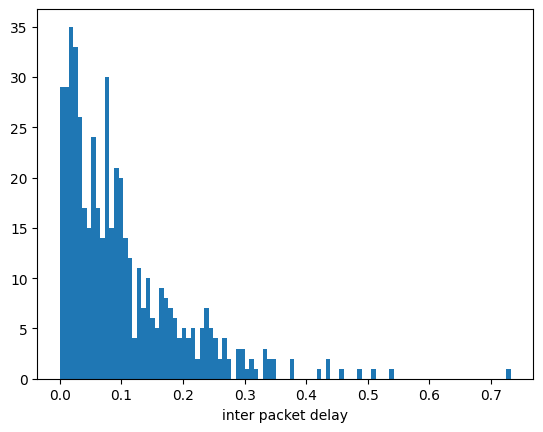

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('./Data/Traffic_data_orig.csv')
IPD = np.diff(data['Time'].tolist())

plt.hist(IPD, bins=100)
plt.xlabel('inter packet delay')
plt.show()

![Alt text](Graph/inter_packet_delay.jpeg)

### 4.3 A Simple Modulation Scheme

Alice and Bob decide to use the following modulation scheme to map the bits to the inter-packet delay. A delay of 0.25 is used to encode a bit 0 and delay of 0.75 is used to encode a bit 1. Write a Python code  that will generate the modified packet stream that contains the secret message. Note  that you will not need all the packets that you are given. 

In [6]:
import csv
with open('./Data/secret_message_bits', 'r') as f:
    msg = f.read()
packet_num = 1
time = 0

with open('./Data/packet_stream4.3.csv', 'w') as csvf:
    writer = csv.writer(csvf)
    writer.writerow(['Packet number', 'Time'])
    writer.writerow([packet_num, time])

    for bit in msg:
        packet_num += 1
        if bit == '0':
            time += 0.25
            writer.writerow([packet_num, time])
            
        else:
            time += 0.75
            writer.writerow([packet_num, time])

### 4.4 Histogram of Inter-packet Delays

Plot the histogram of the inter-packet delay of the covert packet stream. Plot the histogram for  the part of the packet stream that you need to encode the secret message.  Will Eve be suspicious?

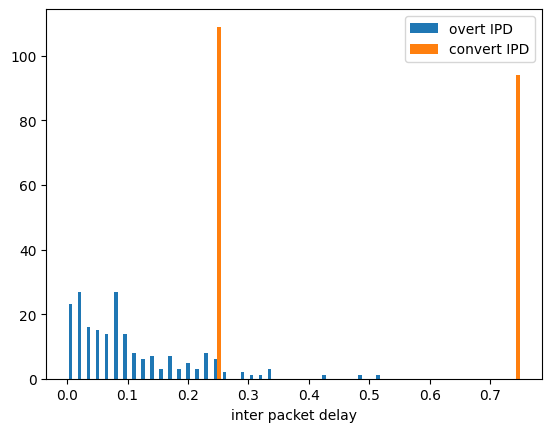

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

orig_data = pd.read_csv('./Data/Traffic_data_orig.csv')
orig_IPD = np.diff(orig_data['Time'].tolist()[:205])

modu_data = pd.read_csv('./Data/packet_stream4.3.csv')
modu_IPD = np.diff(modu_data['Time'].tolist())

plt.hist([orig_IPD, modu_IPD], bins = 50, label = ['overt IPD', 'convert IPD'])
plt.legend(loc = 'upper right')
plt.xlabel('inter packet delay')
plt.show()

![Alt text](Graph/overt_convert4.4.jpeg)

### 4.5  A Better Modulation Scheme

Alice and Bob decide to use the following modulation scheme. Let $m$, $\min$, and $\max$ denote the median, min, and max of the inter-packet delay of the overt packet stream. If Alice needs to send a 0 she randomly generates a delay between $m$ and $\min$. If she want to send a 1 she randomly generates a delay between $m$ and $\max$. First, compute $m$, $\min$, and $\max$ of the overt packet stream. Next, modify the code  in  4.3, to generate  the covert  packet stream that contains  the secret message.

In [5]:
import numpy as np
import pandas as pd
import statistics
import csv
import random

orig_data = pd.read_csv('./Data/Traffic_data_orig.csv')
orig_IPD = np.diff(orig_data['Time'].tolist()[:205])

m = statistics.median(orig_IPD)
max = np.max(orig_IPD)
min = np.min(orig_IPD)

packet_num = 1
time = 0

with open('./Data/secret_message_bits') as f:
    msg = f.read()

with open('./Data/packet_stream4.5.csv', 'w') as csvf:
    writer = csv.writer(csvf)
    writer.writerow(['Packet number', 'Time'])
    writer.writerow([packet_num, time])

    for bit in msg:
        packet_num += 1
        if bit == '0':
            time += random.uniform(min, m)
            writer.writerow([packet_num, time])
            
        else:
            time += random.uniform(m, max)
            writer.writerow([packet_num, time])




### 4.6 Histogram of Inter-packet Delays

Plot the histogram  of the inter-packet  delays of the overt packet stream and that of the new covert packet stream. Again, plot the histogram of the part of the packet stream that you need to encode the secret message. Do you think Eve will be suspicious?

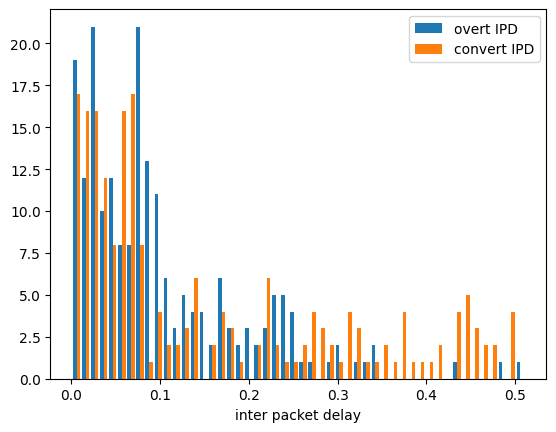

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

orig_data = pd.read_csv('./Data/Traffic_data_orig.csv')
orig_IPD = np.diff(orig_data['Time'].tolist()[:205])

modu_data = pd.read_csv('./Data/packet_stream4.5.csv')
modu_IPD = np.diff(modu_data['Time'].tolist())

plt.hist([orig_IPD, modu_IPD], bins = 50, label = ['overt IPD', 'convert IPD'])
plt.legend(loc = 'upper right')
plt.xlabel('inter packet delay')
plt.show()

![Alt text](Graph/over_convert4.6.jpeg)

### 4.7  Answer the following questions.

      1. How can you improve upon the method in 4.5?
      
      2. We assumed the Alice will buffer up the packets and we mentioned that it was unrealistic. Why?
      
      3. We have assumed that the network does not alter the inter-packet delays. What would be the problem if it did? Can you suggest methods to mitigate the effect of the changes of the inter-packet delay (noise)?

1. Instead of using median, max and min. We can change it to mean and standard deviation. If Alice want to send a 0, she generates a random delay between (mean - STD) and mean. If she wants to send a 1, she generates a random delay betweeen mean and (mean + STD).
2. Because Alice cannot know the IPDs between each overt packet in advance. She can't tell if she bufferd all overt packtes because she would not know how long it takes to buffer all overt packets.
3. The problem could be the correctness of the message. We can add a parity bit at the end of the message to make the total number of 1s be even. In that case the reciever can check if the message is correct by computing the parity bit. If it is wrong, then the sender sends the message again.

## 5. A Real Implementation

In this section, we make the implementation more realistics and address some engineering issues.  

### 5.1 Overview

In the previous part, we assumed that Alice buffers as many packets she requires to transmit the secret message. For eaxmple, if the secret message is 32 bits then Alice will buffer 33 packets and release the packets with appropriate delays based on the encoding scheme to encode the secret message. If the secret message is small, this will work as Alice needs to buffer a small number of packets. However, this will not work if the secret message is long as this will require Alice to buffer large number of packets and this is unealistic (you have found and written good reasons in answering the related question in 4.7 above). 


We will denote $m$ to be the size of the secret message. Also let $B$ denote the maximum number of packets that can be buffered at anytime. The issue of having a large $B$ is that packets that are at the end of the buffer  must wait for all the packets that in the front to be transmitted. This may cause unacceptable delays for the packets. The value of $B$ will be determined by the overt application that ALice is using. For example, for real-time application (such as Augmented Reality/Virtual Reality applications) $B$ will be small whereas for Email application $B$ can be large.   In this study we will consider different values of $m$ and $B$ with $m \geq B$ and Alice, Eve and Bob know the value of $B$ since they all know what is the overt application Alice is using. 

Given $m$ and $B$ what should be Alice's strategy be to tranmit the secret message? There are two important constraints: 

1. Alice cannot buffer more than $B$ packets because of the reason above.
2. Once she starts to transmit the secret message she cannot stop (because she has no way of letting Bob know). She must try to compelete sending the entire secret message.

Alice follows the following strategy. Before starting to transmit the secret message she buffers $i$ ($0 \geq i \leq B$) packets and then starts to release the packets to transmit the secret message. In order to determine what should $i$ be we need to discuss two system states that we need to worry about - buffer overflow and buffer underflow. Let's understand what these are, why these can occur and what are the factors that determine when they will occur. 


1. **Buffer Overflow**: This happens when the buffer already has $B$ packets and another packet arrives from the application. Recall we have said that the number of packets in the buffer cannot exceed $B$. To build  intuition as to when this happens let's consider a specific scenario. Suppose we have set $B = 10$, $m = 32$ and $i=8$. Since $i = 8$,  Alice will first buffer 8 packets. As soon as the 8th packet arrives from the application, she will start transmitting packets with inter-packet delays that encode the secret message.  While she release the packet from the buffer, new packets may arrive from the application that will be appended to the buffer. So the number of packets in the buffer will keep changing - decrease when a packet is transmitted and increase when a packet is generated by the application. Suppose at some time there 7 packets in the buffer and before the next packet is to be transmitted 4 packets arrive in quick succession from the application. This will cause the number of packets in the buffer to go beyond 10 and that will be a violation of policy at most 10 packets can be buffered. Essentially, if packets arrive faster than they are transmitted out, there will be buffer overflow. If $i$ is set close to $B$ there is likely to be an overflow. 


2. **Buffer Underflow**: This happens when a packet must be transmitted (to encode a bit of the secret message) but there are no packets in the buffer. Recall the constraint that once Alice starts to transmit the secret message she cannot stop. Hence, if packets arrive slower than they are transmitted there is likely  be buffer underflow. If $i$ is set close to 0, there is likely to be an underflow. 


**If either of the above two cases (buffer overflow and buffer underflow) arise during the process of sending the secret message we will consider that to be a failure of the covert channel. 


There are many factors that will determine if the covert channel will go into overflow and underflow. These include $m$, $B$, $i$, distribution of the inter-packet delay of the overt application, and the encoding scheme. In this part of the project we will write a simulation to study some of the above factors on the success of transmitting a secret message.  The overall sender-side system is shown in the Figure below. 


<figure> 
    <img src="Figures/ctc-implementation.jpg" width="600" height="400">
    <figcaption align = "center"><b>The overall system diagram of the source and the covert sender. </b></figcaption>
</figure>



### 5.2 Assumptions

  1. We will consider that the source generates packet following well-known IPD distributions. Specifically, we will consider two cases a) Exponential and b) Uniform. The sender (Alice) also knows this distribution and follows it to inject the delay between the packets to embed the secret message. It is important to note that the source and the sender are independent. Hence, even though they follow the same distribution,  the sequence of delays generated by the source will be different from the sequence of delays generated by the sender.
  
  2. To embed a 0, the sender generates a delay between the minimum value (min) and the median. To embed a 1 the sender generates a delay between the median value and the maximum value (max). Note that  for the Uniform distribution the min, max and median are easy to determine. For the Exponential distribution min is 0, the max is $\infty$. What is the median value of an Exponential distribution with rate parameter $\lambda$ pkts/sec?
  
  3. The secret message is a randomly generated sequence of 1s and 0s of size $m$ bits and is given. We will consider two values $m=16, 32$.
  
  4. The sender has a buffer of size $B$ and initially the sender buffers $i$ packets before starting to send the secret message.
  

### 5.3 Project Steps 

  1. For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Exponential with $\lambda =1$ pkts/sec and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits. Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$. The max value of an Exponential distribution is $\infty$. For this study  we can limit the max value to say 5 ~secs$. 
  
  2. ***Ignore this step*** For  buffer size $B=20$ we want to find out the probability of overflow  and  underflow, when the IPD follows the Uniform distribution in the range (0,1)  and $i=2, 6, 10, 14, 18$. Use message size $m = 16, 32$ bits.  Tabulate the results. Remember that to determine the probability you need to run multiple (say 500) experiments for each parameter, i.e., for $B = 20, m = 16, i = 2$ run 500 experiments  and determine the probability of overflow and underflow. Similarly for other values of $i$ and $m$.

  
  3. Propose methods to deal with buffer overflow and underflow.

### 5.4 Notes on Simulating the Implementation

For steps 1 and 2, since the source and the sender are independent processes, a proper way to simulate would be using a  discrete event simulation module such as simpy in Python.  However, we can simplify and just use standard Python. To do this,  we can pre-generate the times when the source generates packets and store it in a list. Then we can write the code to simulate the buffer, the encoding scheme, and  the sender. This can be done in a single "process." Based on this, following is a very **rough** set of steps to simulate the system.

For each experiment we can break it down to the following steps


 1. Generate the random bit pattern of 1s and 0s of size $m$ which is the secret message.

 2. Generate a sequence of times when the source will generate the packets. This is based inter-packet delay (IPD) distribution of the packets generate by the source. You can intuit what is the worst case number of packets that you need.

 3. For the buffer you need to keep some  variables such as B: buffer size, i: the initial buffer size to start sending he secret message bits and CB: current buffer size.

 4. For the sender you need to maintain some variables such as the time when the next packet will be sent.

 5. For each secret message bit:


       a. Generate a delay following the encoding scheme and hence determine when  the next packet will be transmitted.
       
       b. Update the state of the buffer depending on the number of arrivals during that time.
       
       c. At appropriate places check for buffer underflow and overflow and break out if it is the case.
       
       d. Appropriately update the current time.


  6. Do the experiment multiple times to calculate the different probabilities.
  

Your code here that you used to generate the results

In [12]:
import numpy as np
import random
from tabulate import tabulate
# Requirements: pip install tabulate
# How to use: First enter the size of message. Then enter the number of i values you want to test.
# Finally enter each i value in turn. The programm will return the result in the form of a table.

BUFFER_SIZE = 20
NUM_TRIALS = 500
MIN = 0
MEDIAN = 0.69
MAX = 5

class Buffer:
    def __init__(self, buffer_size) -> None:
        self.B = buffer_size
        self.CB = 0
        pass

class Source:
    def __init__(self, ex_size) -> None:
        # generate exponential distribution IPDs
        self.IPDs = np.random.exponential(scale = 1, size = ex_size)
        
        # get the sending packets' schedule from IPDs
        # https://stackoverflow.com/questions/43563241/numpy-diff-inverted-operation
        self.time = np.hstack((0, self.IPDs)).cumsum()
        pass

class Sender:
    def __init__(self, msg) -> None:
        self.IPDs = self.generate_converted_IPDs(msg)
        self.time = []
        pass

    def generate_converted_IPDs(self, msg):
        converted_IPDs = []
        for bit in msg:
            if bit == '0':
                converted_IPDs.append(random.uniform(MIN, MEDIAN))
            else:
                converted_IPDs.append(random.uniform(MEDIAN, MAX))
        return converted_IPDs

# experimental constants
m = int(input("Enter message size: "))
n = int(input("Enter number of i_vals: "))
i_vals = []
for j in range(n):
    i = int(input("Enter i: "))
    if i > BUFFER_SIZE:
        print("i value should be less than 20")
    else:
        i_vals.append(i)



def generate_secret_msg(message_size):
    msg = ''
    for i in range(message_size):
        msg += str(random.randint(0,1))
    return msg

msg = generate_secret_msg(m)
buffer = Buffer(BUFFER_SIZE)
results = []
head = ['M size', 'i', 'Underflow', 'Overflow', 'Success']

for i in i_vals:
    num_overflow = 0
    num_underflow = 0
    
    for j in range(NUM_TRIALS):
        buffer.CB = i
        source = Source(m * 10)
        sender = Sender(msg)
        sender_start_time = source.time[i - 1]
        sender.time = np.hstack((sender_start_time, sender.IPDs)).cumsum()

        for k in range(i, m):
            time = source.time[k]
            overt_packets = k - i + 1
            convert_packets = np.sum(sender.time <= time)
            buffer.CB += (overt_packets - convert_packets)

            #test states
            if buffer.CB > buffer.B:
                num_overflow += 1
                break
            if buffer.CB < 0:
                num_underflow += 1
                break

    num_success = NUM_TRIALS - num_overflow - num_underflow
    Po = num_overflow / NUM_TRIALS
    Pu = num_underflow / NUM_TRIALS
    Ps = num_success / NUM_TRIALS
    results.append([m, i, Pu, Po, Ps])

print(tabulate(results, headers= head))

  M size    i    Underflow    Overflow    Success
--------  ---  -----------  ----------  ---------
      16    2        0.232       0.674      0.094
      16    6        0.12        0.468      0.412
      16   10        0.054       0.022      0.924
      16   14        0           0          1
      16   18        0           0          1


Results:

  M size    i    Underflow    Overflow    Success
--------  ---  -----------  ----------  ---------
      32    2        0.838       0.162      0
      32    6        0.386       0.614      0
      32   10        0.182       0.814      0.004
      32   14        0.102       0.866      0.032
      32   18        0.056       0.858      0.086
      
  M size    i    Underflow    Overflow    Success
--------  ---  -----------  ----------  ---------
      16    2        0.232       0.674      0.094
      16    6        0.12        0.468      0.412
      16   10        0.054       0.022      0.924
      16   14        0           0          1
      16   18        0           0          1


Give a version of the code that I can run for different values of the parameters. Write a comment on how to run the cod

SAME AS ABOVE

Propose methods to deal with buffer overflow and underflow.

Add a parity bit at the end of the message to make the total number of 1s be even. In that case the reciever can check if the message is correct by computing the parity bit. If it is wrong, then the sender sends the message again.

## 6 A Simple Analysis

In this section we will do a simple analysis of above approach using the Gambler Ruin's problem. Keep in mind that it is approxiumate. The idea to see how the implementation can be mapped into a well known problem.

### 6.1 Gambler's Ruin Problem

Two players A and B play a game which consists of a sequence of rounds; in each round they bet 1 dollar. If A wins the round, A gets 1 dollar from B, if he loses, A gives 1 dollar to B. The probability  that A wins a round is $p$ and hence the probability that A loses a round is $q = 1 - p$. Suppose A and B combined have $N$ dollars of which A has $i$ dollars and B $N - i$ dollars and they continue to play until A has $N$ dollars and  wins the game (and hence B becomes bankrupt) or A has 0 dollars and loses the game (hence A becomes bankrupt). We want to find the probability $P_i$ that A wins the game starting  with $i$ dollars.

The basic strategy is to condition on the first step and using the Law of Total Probability

\begin{equation*}
        P_i = p P_{i+1} + q P_{i-1}  ~~~~~~~~ 1  \leq i \leq N -1
\end{equation*}
with $P_0 = 0$ and $P_N = 1$.

Since $p+q =1$, we can rewrite the above equation as


\begin{eqnarray*}
       (p+q)  P_i &=& p P_{i+1} + q P_{i-1}  ~~~~~~~~ 1  \leq i \leq N -1  \\
       p P_{i+1} - p  P_i &=& q  P_i - q P_{i-1}  \\
        P_{i+1} - P_i &=& \frac{q}{p} (P_i - P_{i-1}) \\
\end{eqnarray*}

For $i = 1$, the equation can be written as:


\begin{eqnarray*}
        P_{2} - P_1 &=&  \frac{q}{p} (P_1 - P_{0}) \\
        P_{2} - P_1 &=&  \frac{q}{p} P_1
\end{eqnarray*}

Similarly for $i = 2$ we can easily show that:


\begin{eqnarray*}
        P_{3} - P_2 &=&  \frac{q}{p} (P_2 - P_{1}) \\
        P_{3} - P_2 &=& ( \frac{q}{p})^2 P_1
\end{eqnarray*}


and for $i = N-1$


\begin{eqnarray*}
        P_{N} - P_{N-1} &=&  \frac{q}{p} (P_{N-1} - P_{N-2}) \\
        P_{N} - P_{N-1} &=& ( \frac{q}{p})^{N-1} P_1
\end{eqnarray*}


Now if we take the first $i-1$ terms and sum them  we will get:


\begin{eqnarray*}
        P_{i} - P_{1} &=&  P_{1} [\frac{q}{p}  + (\frac{q}{p})^{2} + \ldots  + ( \frac{q}{p})^{i-1} ] \\
\end{eqnarray*}


We can show that:


\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})} P_1   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    i P_1  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}


Considering $\frac{q}{p} \neq 1$  and using the fact $P_N = 1$, we have


\begin{eqnarray*}
        P_N &=& 1 \\
                &=&  \frac{1 - (\frac{q}{p})^N}{1 - (\frac{q}{p})} P_1
\end{eqnarray*}


From which we obtain:


\begin{equation*}
P_1 =  \frac{1 - (\frac{q}{p})}{1 - (\frac{q}{p})^N}
\end{equation*}


Similarly, if $\frac{q}{p} = 1$, then $P_N = 1 = N P_1$ which implies that $P_1 = \frac{1}{N}$ and thus $P_i = \frac{i}{N}$, now we have:


\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N}   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    \frac{i}{N}  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}



### Notes and Remarks

1. We first show that $p = q$ is a limiting case of $p \neq q$. Let $x = \frac{q}{p}$. We want to find the limit of $P_i$ as $x \rightarrow 1$.


\begin{eqnarray*}
\lim_{x \to 1} P_i &=& \lim_{x \to 1} \frac{1 - x^i}{1 - x^N} \\
 											  &=& \frac{i}{N}
\end{eqnarray*}


2. Does the game go forever? 

Consider the case with $\frac{q}{p} = 1$. $P(\text{A wins starting with $i$)}) = P_i =  \frac{i}{N}$. Similarly, $P(\text{A loses starting with $i$}) = P(\text{B wins starting with $N-i$}) = \frac{N-i}{N}$. Since the probability of A winning or B winning is equal to 1, then the probability  of neither winning (game going forever) is 0.

3. Let $i = N - i$, i.e., $i = \frac{N}{2}$ . Also let $p = 0.49$

    3.1\. $N = 20 \Rightarrow P_i = 0.4$

    3.2\. $N = 100 \Rightarrow P_i = 0.12$

    3.3\. $N = 200 \Rightarrow P_i = 0.02$

4.  If $p < q$ which implies $x = \frac{q}{p} > 1$, then


\begin{eqnarray*}
\lim_{N \to \infty} P_i &=& \lim_{N \to \infty} \frac{1 - x^i}{1 - x^N} \\
 											  &=&0
\end{eqnarray*}

This implies that with probability 1, the Gambler will get "ruined" if she chooses to play the game for an "infinite" number of rounds.

### 6.2 A Simple Analysis 

Coming back to our project, can you map the implementation that you did in Section 5 to the Gambler's ruin problem? Your goal is to create a table as in Section 5.6 based on the results that we have derived in the above section. There are many similarities but there are some limitations as well. 

### 6.3 Model 
Write a short paragraph how the implementation in Section 5 can be mapped to the Gambler's Ruin problem.  What is the limitation of using the model?  

We can consider the sender Alice as a player in Gambler's Ruin problem. If she successfully sends out the secrest message she wins the game. We can make the following mappings:
1. the number of packets i in the buffer when starting to send -> the i dollars player A has at the start of game
2. the message size m -> the total dollars N A and B combined
3. the probability of successfully sending the secret message $P_{i}$ -> the probability of winning the game $P_{i}$

Let p denotes the probability of successfully sending a single packet, q denotes the probability of failure(i.e., $P_{overflow} + P_{underflow}$ for a single packet).

By applying to the Gambler's Ruin model:
\begin{equation*}
P_i  =
    \begin{cases}
    \frac{1 - (\frac{q}{p})^i}{1 - (\frac{q}{p})^N}   &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} \neq 1 \\
    \frac{i}{N}  &  ~~~~~~~~~~~~~~\text{if} ~~~\frac{q}{p} = 1
    \end{cases}
\end{equation*}

And: p + q = 1

We can get the p and q.

Limitations:

1.We can only get the probability of failure which is the sum of $P_{overflow}$ and $P_{underflow}$. We cant know them respectively.

2.We assume that p and q are identically independent. Obviously, the probability of overflow and underflow for each packet depends on their coressponding inter packet delays.

3.We have to assume that p and q are equal or not to decide which formula to use.

4.i must be less than N.


### 6.5 Model Results 
For the parameters given in  Step 1 in Section 5.3 (i.e., for the case of the Exponential distribution) determine the overflow  and underflow probabilities for different values of $i$ using the Gambler's Ruin problem. 

  M size    i      p      q
--------  ---  -----  -----
      16    2  0.424  0.576
      16    6  0.461  0.539
      16   10  0.513  0.487
      16   14  0.656  0.344
      32    2  0.52   0.48
      32    6  0.502  0.498
      32   10  0.49   0.51
      32   14  0.471  0.529
      32   18  0.422  0.578

First, I run the code in section5.3 to get a table containing m, i, pi values. Then I put these values into the Gambler's Ruin model based on the assumption that p is not equal to q. Finally I use simpy library of python to solve the system of equations and plot the results into a table

## 7 Detection 

In this section we will investigate some simple appropaches to detect timimng channels. This is the task of Eve. 

As mentioned in Section 4.2,  we assume that Eve has a packet stream that is "clean" i.e., it is not modified by a timing channel. Eve can derive many features from this packet stream. One that we have focussed in Section 4.2 is the distribution of the inter-packet delay. (You may reflect on what other fetaures you could consider.)

Given the baseline inter-packet delay distribution, what Eve will do is the following 

1. Take a sample of the packet stream when Alice and Bob talk
2. Extract the inter-packet delay distribution
3. Compare with the baseline 
4. Flag if the distribution are different

There are many engineering issues with each of the above steps but here we will focus on Steps 3 and 4. The basic problem is the following. We have two sets of inter-packet delay samples. We want to know if they are from the same distribution. You can guess that this must be common problem and there must be many different approaches. Yes there are many methods. There are qualitative approcheas such as l comparing the boxplots, the cummulative distribution finctions, the histograms, the Q-Q plot, and the Kernel density functions. There are quantitative statistical test such the T-test, Mann–Whitney U Test, the Kolmogorov–Smirnov test, among others.  For this project we will focus on the Q-Q plot. 

### 7.1 Q-Q Plot

In Q-Q plot \[Q stands for quantile\], the quantiles of the two distributions are plotted against each other. If the distributions are the same, we should get a 45-degree line.

We will use two Python modules numpy and statsmodels.  You must install these modules either using pip3 or  conda. 

The basic function is qqplot. It by default plots quantiles with respect to quantiles of the standard normal (Z) distributtion. 


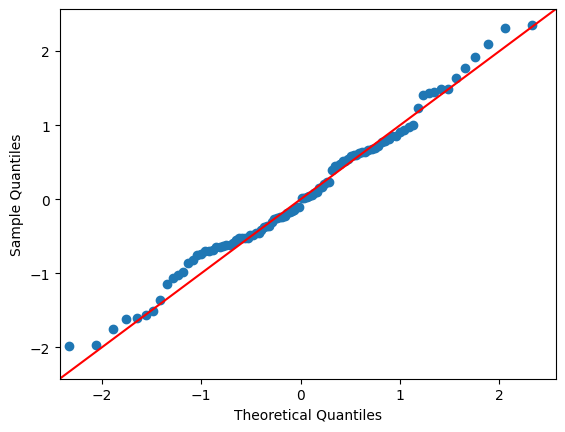

In [2]:
import numpy as np
import statsmodels.api as sm
import pylab as py
  
# Generate 100 samples from a standard normal (Z) distribution
sample_data1 = np.random.normal(0, 1, 100)
sm.qqplot(sample_data1, line ='45')

py.show()

\[ I have not figured out how to resolve the warning. If someone does, please let me know]\]

In the above code see what happens when you increase the number of samples to 1000 and then to 10000. 

Next we generate sample from an Exponential distribution  with rate $\lambda =1 $  and get the Q-Q plot. 

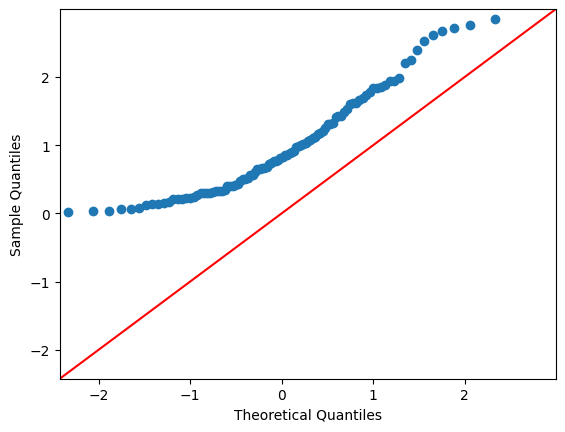

In [4]:
# Generate 100 samples from an exponential distribution with rate $\lambda =1 $
sample_data1 = np.random.exponential(1, 100)
sm.qqplot(sample_data1, line ='45')
py.show()

### 7.2 Q-Q Plot with 2 Samples 

qqplot_2samples gives the Q-Q plots for the quantiles derived from two data sets. We will consider the size of both samples to be the same althougth it is not required. In following code see what happens as you increase the number of samples

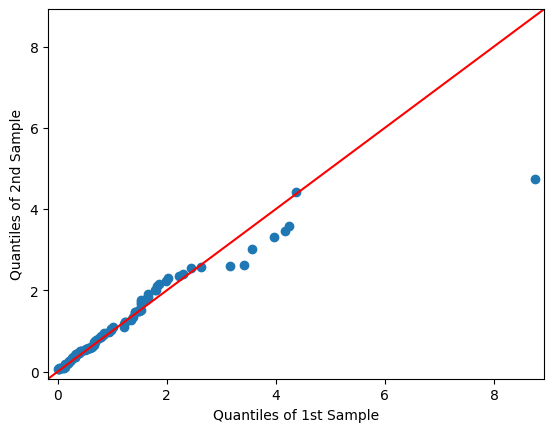

In [5]:
# Generate 100 samples from an exponential distribution with rate $\lambda =1 $
sample_data1 = np.random.exponential(1, 100)
# Generate another 100 samples from the  exponential distribution with rate $\lambda =1 $
sample_data2 = np.random.exponential(1, 100)
sm.qqplot_2samples(sample_data1, sample_data2, line ='45')
py.show()

### 7.3 A Simple Task

For this project, using the qqplot_2samples, get the Q-Q plot of the inter-packet delays generated in Section 4.5 with that of the baseline. Use only the inter-packet delays that contain the the secret message. Use the same number of inter-packet delays from the baseline traffic. 

Include the code and that will generate the plot. 

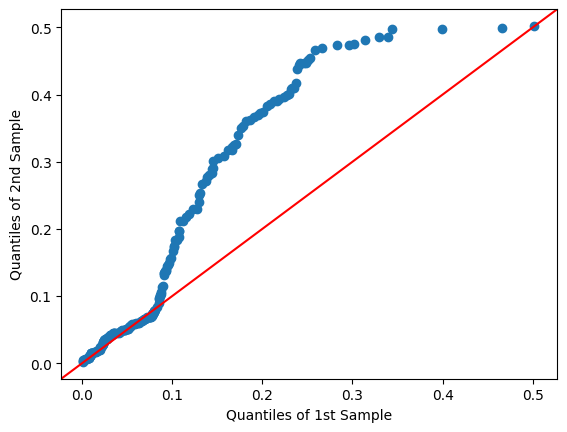

In [6]:
import numpy as np
import statsmodels.api as sm
import pylab as py
import pandas as pd

overt_data = pd.read_csv('./Data/Traffic_data_orig.csv')
convert_data = pd.read_csv('./Data/packet_stream4.5.csv')

overt_IPDs = np.diff(overt_data['Time'].tolist()[:205])
convert_IPDs = np.diff(convert_data['Time'].tolist())
sm.qqplot_2samples(overt_IPDs, convert_IPDs, line ='45')
py.show()

## 8 Submission Guidelines

For this project  there is one input file and some input figures (the drawings). You will write code  which will generate results and figures. 

1. Put this jupyter notebook, the input file, and the result figures you generaye in one folder. Make sure that paths are set properly and  the figures will render when I open the notebook. 

2. Submit a zipfile of the folder. 


3. The Project is due 3/16 at 11:59pm